In [4]:
#word2vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec
import gensim.downloader as api


# Part 1

In [43]:
w2v = api.load('word2vec-google-news-300')

 - Just like the experiment from the lecture where we checked king - man + woman ~= queen  - come with 2-3 similar examples and test them with the pretrained word2vec model’s vectors.

In [21]:
# Hitler - Germany + India
w2v.most_similar(positive=['India', 'Hitler'], negative=['Germany'], topn=10)


[('Gandhi', 0.5814497470855713),
 ('Mahatma', 0.5629701018333435),
 ('Advani', 0.552466869354248),
 ('Pandit_Nehru', 0.55074143409729),
 ('Gandhiji', 0.5457271933555603),
 ('Mahatma_Gandhi', 0.5436198115348816),
 ('Mrs_Gandhi', 0.5360263586044312),
 ('Narendrabhai', 0.5358207821846008),
 ('Indias', 0.5333536267280579),
 ('Sachin', 0.5310025811195374)]

In [26]:
# Messi - Argentina + India
w2v.most_similar(positive=['India', 'Messi'], negative=['Argentina'], topn=10)

[('Tendulkar', 0.6047088503837585),
 ('Sachin', 0.6005342602729797),
 ('Dhoni', 0.5961304903030396),
 ('Sachin_Tendulkar', 0.5901703834533691),
 ('Sehwag', 0.5820451974868774),
 ('Bhaichung', 0.5790982842445374),
 ('Advani', 0.572263240814209),
 ('Baichung', 0.5677506327629089),
 ('Yuvraj', 0.5615578293800354),
 ('Baichung_Bhutia', 0.5489465594291687)]

In [29]:
# Hollywood - USA + India
w2v.most_similar(positive=['India', 'Hollywood'], negative=['USA'], topn=10)

[('Bollywood', 0.6083657741546631),
 ('Hindi_cinema', 0.5411365628242493),
 ('Bhojpuri_films', 0.5381293296813965),
 ('tinseltown', 0.5338340997695923),
 ('Kollywood', 0.5309063792228699),
 ('showman_Subhash_Ghai', 0.5246851444244385),
 ('tinsel_town', 0.524330198764801),
 ('superstar_Rajinikanth', 0.5229507684707642),
 ('Hindi_films', 0.5204671025276184),
 ('Kannada_cinema', 0.5200139284133911)]

- Pick any 5 words of your choice and find the model similar words for each of these 5 words.


In [25]:
words = ['hitler', 'apple', 'python', 'microsoft', 'ronaldo']

for word in words:
    # Find the top 5 most similar words
    # put them properly in a structure.
    print(f" The most similar words to {word} are:")
    df = pd.DataFrame(w2v.most_similar(word, topn=5), columns=['Word', 'Score'])
    print(df)

    

 The most similar words to hitler are:
          Word     Score
0       stalin  0.671733
1  george_bush  0.638751
2      hussein  0.633550
3       reagan  0.626370
4       chavez  0.623288
 The most similar words to apple are:
     Word     Score
0  apples  0.720360
1    pear  0.645070
2   fruit  0.641015
3   berry  0.630230
4   pears  0.613396
 The most similar words to python are:
              Word     Score
0          pythons  0.668838
1   Burmese_python  0.668037
2            snake  0.660629
3        crocodile  0.659136
4  boa_constrictor  0.644352
 The most similar words to microsoft are:
               Word     Score
0   adobe_photoshop  0.804237
1  microsoft_office  0.797868
2        windows_xp  0.792649
3     buy_microsoft  0.790263
4               cs4  0.749490
 The most similar words to ronaldo are:
          Word     Score
0       drogba  0.795108
1  real_madrid  0.791445
2        messi  0.787991
3       rooney  0.787690
4        tevez  0.785194


# Part 2

- Build a movie review sentiment classifier using Word2Vec

In [11]:
data = pd.read_csv('./data/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


    1. Perform text EDA
    

C:\Users\Public\Temp\ipykernel_26316\1639130463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='viridis')


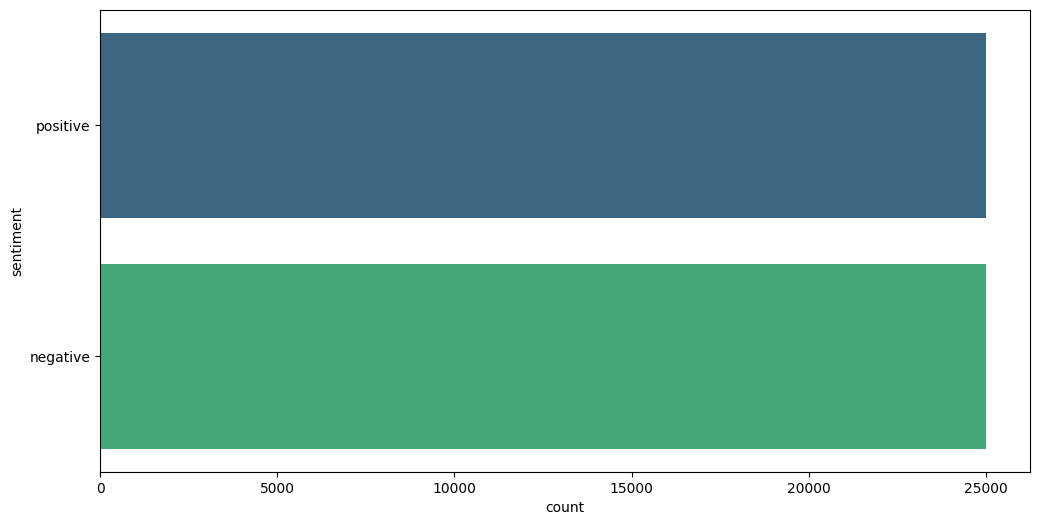

In [12]:
# EDA
data['sentiment'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(data['sentiment'], palette='viridis')
plt.show()

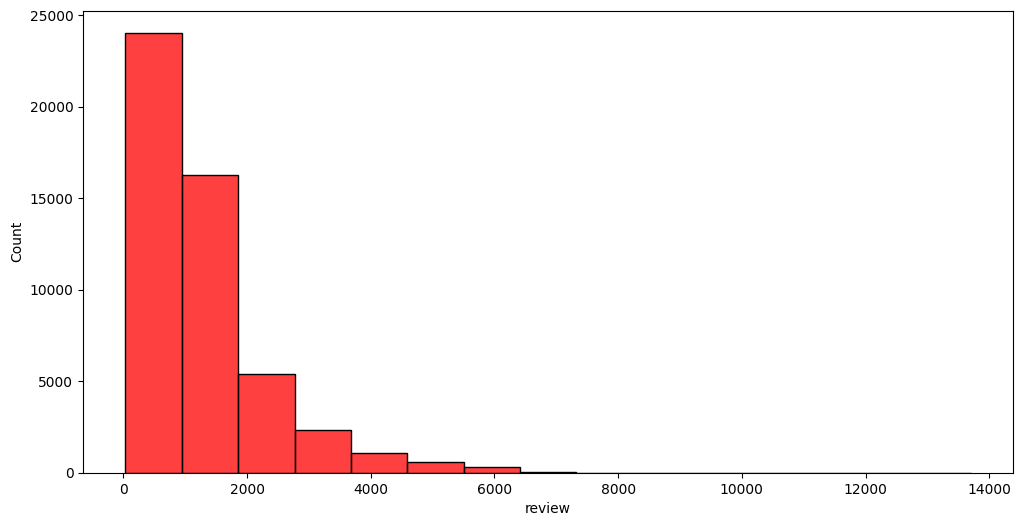

In [13]:
# Length of the reviews
rev_len = data['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(rev_len, bins=15, color='red')
plt.show()

In [14]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


    2. Clean the text - remove noisy tokens like punctuations and stopwords

In [15]:
# Preprocess DAta
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop = stopwords.words('english')
#Tokenize
#data['review'] = data['review'].apply(word_tokenize)
def preprocess_text(text):
    text = word_tokenize(text)
    text = [word for word in text if word not in string.punctuation]
    text = [word for word in text if word not in stop]

    return text

data['review_tok'] = data['review'].apply(preprocess_text)
data

,review,sentiment,review_tok
0,One of the other reviewers has mentioned that ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, wonderful, way, spend, time, hot,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, 's, family, little, boy, Jake, thi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, 's, ``, Love, Time, Money, ''..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, movie, right, good, job, It, n't,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, Catholic, taught, parochial, elementary, s..."
49998,I'm going to have to disagree with the previou...,negative,"[I, 'm, going, disagree, previous, comment, si..."


    3. Train a model of your choice using a custom Skip-gram vectors

In [18]:
# skip gram
skipgram = Word2Vec(data['review_tok'], vector_size=50, window=5, sg=1, min_count=1)


    4. Train a model of your choice using a custom CBOW vectors

In [21]:
#CBOW

cbow = Word2Vec(data['review_tok'], vector_size=50, window=5, sg=0, min_count=1)




In [22]:
skipgram.save('skipgram.model')
cbow.save('cbow.model')

In [ ]:
skipgram = Word2Vec.load('skipgram.model')
cbow = Word2Vec.load('cbow.model')

In [31]:
# create skipgram dataset
skipgram_data = skipgram.wv
# create dataframe
def create_dataset(model, data):
    skipgram_data = model.wv
    embedding = [skipgram_data[word] for word in data if word in skipgram_data]
    return np.mean(embedding, axis=0)

skipgram_vectors = data['review_tok'].apply(lambda x: create_dataset(skipgram, x))
skipgram_vectors.shape

(50000,)

In [35]:
#split list of vectors into columns
skipgram_vectors = pd.DataFrame(skipgram_vectors.tolist())
skipgram_vectors['sentiment'] = data['sentiment']
skipgram_vectors

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sentiment
0,0.089862,-0.144484,-0.011426,0.226821,-0.144927,-0.390267,0.602098,0.583866,-0.515392,-0.012747,...,0.011161,-0.255719,-0.065878,0.789255,0.036451,-0.133574,-0.121014,0.288839,0.376821,positive
1,0.064518,-0.202783,-0.081319,0.178070,-0.256735,-0.443055,0.546016,0.594081,-0.420083,0.028110,...,0.002322,-0.336244,-0.043626,0.649511,0.184056,-0.195769,-0.051114,0.186571,0.421223,positive
2,0.077590,-0.032701,-0.110234,0.278926,-0.121453,-0.481824,0.510527,0.526703,-0.446877,0.049257,...,0.019522,-0.238912,-0.078380,0.763461,0.129109,-0.184595,-0.271294,0.339820,0.304139,positive
3,-0.039360,-0.136868,-0.077118,0.177616,-0.142800,-0.431304,0.631717,0.571770,-0.428050,-0.037626,...,0.058197,-0.297764,-0.097022,0.711488,0.120380,-0.222980,-0.172634,0.252481,0.375839,negative
4,0.046809,-0.110770,-0.051176,0.132136,-0.191658,-0.394373,0.591125,0.592680,-0.382391,-0.074474,...,0.039056,-0.289048,-0.031967,0.748279,0.198818,-0.218404,-0.105047,0.309803,0.299314,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.163632,-0.100599,-0.086371,0.181192,-0.081471,-0.490474,0.652088,0.555164,-0.490400,0.110144,...,0.123452,-0.284689,-0.054207,0.803255,0.125120,-0.211713,-0.206992,0.332697,0.324401,positive
49996,0.178367,-0.139983,-0.138363,0.190867,-0.183227,-0.522339,0.595977,0.566763,-0.450124,0.081154,...,0.061680,-0.263614,-0.026332,0.656328,0.121997,-0.161086,-0.134216,0.192580,0.357452,negative
49997,-0.098849,-0.144236,-0.075503,0.184695,-0.126639,-0.426784,0.656498,0.605616,-0.445768,-0.073688,...,0.040082,-0.218974,-0.118894,0.683439,-0.033074,-0.183314,-0.117089,0.300172,0.346910,negative
49998,0.061300,-0.114714,-0.050510,0.143672,-0.200530,-0.376255,0.539675,0.589151,-0.384836,-0.063437,...,-0.062796,-0.240666,-0.126094,0.772511,0.143585,-0.208414,-0.108959,0.283916,0.344960,negative


In [36]:
from sklearn.model_selection import train_test_split
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
X, y = skipgram_vectors.drop('sentiment', axis=1), skipgram_vectors['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)



Accuracy Score: 0.8632


C:\Users\Public\Temp\ipykernel_26316\3779794142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_pred, palette='viridis')


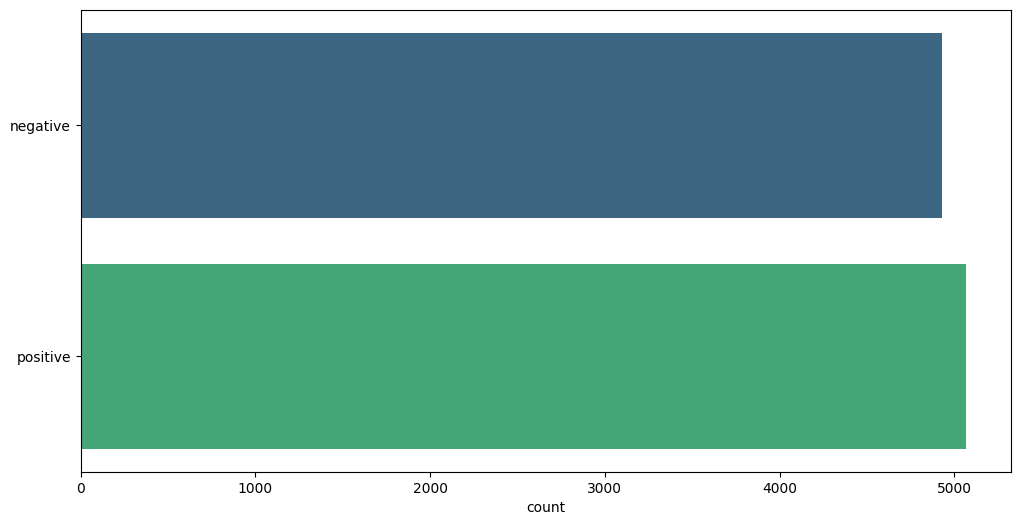

In [38]:
plt.figure(figsize=(12, 6))
#accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
sns.countplot(y_pred, palette='viridis')
plt.show()

In [39]:
cbow_data = data['review_tok'].apply(lambda x: create_dataset(cbow, x))
cbow_vectors = pd.DataFrame(cbow_data.tolist())
cbow_vectors['sentiment'] = data['sentiment']
cbow_vectors

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,sentiment
0,0.914801,0.806376,0.396812,-0.016790,-0.196385,-0.909324,0.222732,0.428817,-0.374939,-0.216977,...,0.243457,-0.506146,-0.249615,0.369066,-1.140391,0.608764,0.030866,0.620469,0.311851,positive
1,0.970838,0.462125,0.537504,0.330473,-0.388408,-1.165184,0.330834,0.228631,-0.781459,-0.418120,...,0.441025,-0.872459,-0.043641,-0.129630,-0.495425,0.733875,0.507248,0.425655,0.393662,positive
2,0.895078,0.824192,0.388412,0.168645,-0.710388,-1.024005,0.267007,0.212286,-0.570395,-0.025860,...,0.404145,-0.836951,-0.156127,0.283707,-0.722476,0.502509,0.055092,1.462482,-0.196885,positive
3,0.703679,0.708539,0.584855,0.064774,-0.435777,-1.176545,0.019651,0.091888,-0.632422,-0.578749,...,0.340372,-0.453446,-0.333638,0.269513,-0.988344,0.334589,0.347551,0.947560,0.263735,negative
4,0.892430,0.721889,0.384796,0.106746,-0.094521,-1.062073,0.204433,0.181981,-0.468750,-0.650878,...,0.324595,-0.681367,0.181237,0.526548,-0.978196,0.749534,0.489110,1.006253,-0.065973,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.270758,1.356303,1.065742,-0.167160,-0.516350,-1.842358,-0.008535,-0.239054,-0.502389,-0.119744,...,0.492713,-0.910892,-0.037202,-0.020845,-1.366776,0.412551,0.422225,1.523518,-0.298660,positive
49996,1.434852,0.725107,0.244455,0.269083,-0.970260,-1.277086,0.384983,0.126038,-0.241906,-0.185555,...,0.527279,-0.541840,-0.311895,0.383850,-0.549172,0.363585,0.687913,1.207887,0.078644,negative
49997,0.612731,0.878478,0.096341,-0.097228,0.179305,-1.293595,0.055212,0.499261,-0.288386,-0.415579,...,0.169276,-0.425509,-0.076166,0.524154,-1.001215,0.597670,0.144322,0.899511,0.263012,negative
49998,0.340125,0.513208,0.211688,-0.083860,-0.264922,-0.923297,0.116015,0.316939,-0.226443,-0.238046,...,-0.196075,-0.544050,-0.161918,0.809990,-0.441307,0.732065,0.250077,0.864495,0.245212,negative


In [40]:
X, y = cbow_vectors.drop('sentiment', axis=1), cbow_vectors['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Accuracy Score: 0.8406


C:\Users\Public\Temp\ipykernel_26316\3065182782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_pred, palette='viridis')


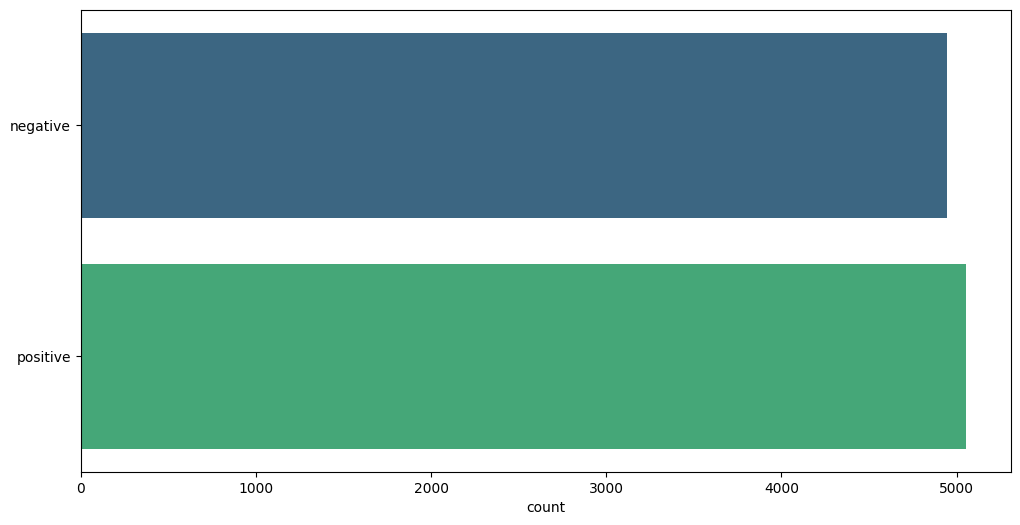

In [41]:
plt.figure(figsize=(12, 6))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
sns.countplot(y_pred, palette='viridis')
plt.show()

    5. Train a model of your choice using any pretrained word2vec model’s vectors 

In [55]:
def create_dataset(model, data):
    #skipgram_data = model.wv
    embedding = [w2v[word] for word in data if word in w2v]
    return np.mean(embedding, axis=0)
w2v_data = data['review_tok'].apply(lambda x: create_dataset(w2v, x))
w2v_vectors = pd.DataFrame(w2v_data.tolist())
w2v_vectors['sentiment'] = data['sentiment']
w2v_vectors

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,sentiment
0,0.050171,0.058981,0.032146,0.075413,-0.054226,-0.002910,0.032304,-0.057252,0.067525,0.097942,...,0.014536,-0.106087,0.019971,-0.030146,-0.023352,-0.000774,-0.077582,0.041059,-0.021929,positive
1,0.066259,0.068040,-0.024218,0.042263,-0.052552,0.042120,0.031523,-0.072760,0.091772,0.083169,...,0.026591,-0.059346,0.025877,-0.047313,-0.067651,0.060480,-0.061864,0.041191,-0.012046,positive
2,0.034160,0.051678,-0.007186,0.095730,-0.032178,-0.005378,0.044700,-0.052473,0.083283,0.102551,...,0.048955,-0.115715,0.014450,-0.049302,-0.070546,0.031424,-0.069255,0.024569,-0.025774,positive
3,0.064125,0.035118,-0.028289,0.078605,-0.042998,0.062032,0.053750,-0.059275,0.082797,0.098920,...,0.023354,-0.121826,0.025964,-0.016971,-0.067023,-0.018910,-0.056207,0.021167,0.023294,negative
4,0.040861,0.038979,-0.006740,0.052141,-0.018588,0.011286,0.044832,-0.059423,0.065669,0.045992,...,0.040239,-0.089206,0.025429,-0.038090,-0.035852,0.015717,-0.047573,0.045821,-0.020900,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.038944,0.026513,-0.033306,0.134178,-0.041928,0.014238,0.061648,-0.044311,0.051956,0.097855,...,0.094636,-0.081814,0.040028,-0.020685,-0.080108,-0.011635,-0.072377,0.028970,-0.024652,positive
49996,0.034510,0.042242,0.019947,0.056822,-0.089552,0.047746,0.022752,-0.005872,0.088907,0.094907,...,0.100691,-0.090836,0.034460,-0.000830,-0.041937,0.001031,-0.052435,0.013011,0.013911,negative
49997,0.092430,0.036715,0.076537,0.099292,-0.030906,-0.004939,0.053466,-0.036767,0.088969,0.065676,...,-0.000850,-0.168406,0.005563,-0.051953,0.013440,0.024922,-0.063124,0.043873,0.032514,negative
49998,0.072818,0.060372,0.007756,0.056367,-0.019688,-0.029165,0.065569,-0.060688,0.082277,0.094850,...,0.006899,-0.083021,0.022930,-0.057218,-0.042411,0.032865,-0.069765,0.029059,0.021467,negative


Accuracy Score: 0.8513


C:\Users\Public\Temp\ipykernel_26316\171737028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_pred, palette='viridis')


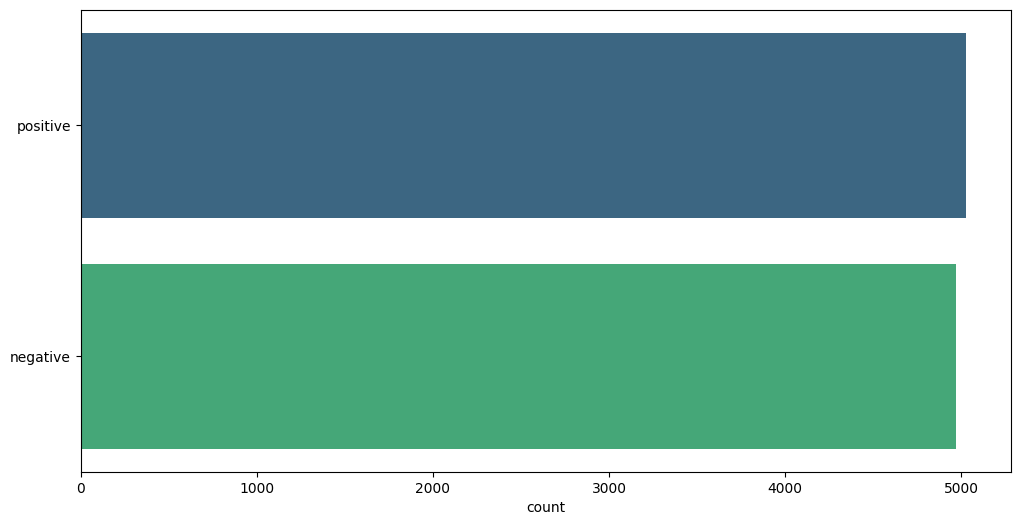

In [56]:
X, y = w2v_vectors.drop('sentiment', axis=1), w2v_vectors['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

plt.figure(figsize=(12, 6))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
sns.countplot(y_pred, palette='viridis')
plt.show()

    6. Check if you can improve the model performance for [2] and [3] by updating the vector length, window size, min count, etc.

Accuracy Score: 0.876


C:\Users\Public\Temp\ipykernel_26316\2592066722.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_pred, palette='viridis')


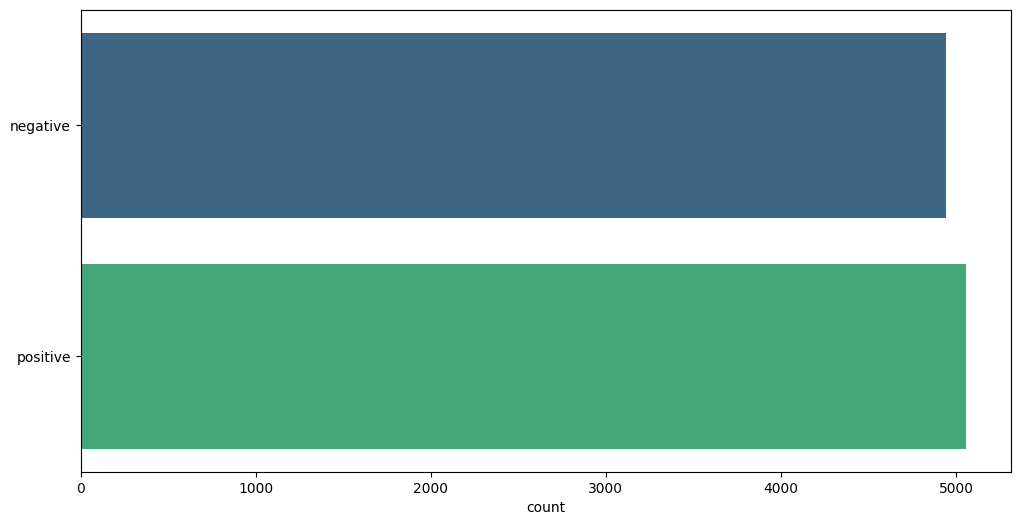

In [52]:
#word2vec improved
#skipgram improved

skipgram_enhanced = Word2Vec(data['review_tok'], vector_size=400, window=10, sg=1, min_count=1)
skipgram_enhanced.save('skipgram_enhanced.model')

skipgram_enhanced = Word2Vec.load('skipgram_enhanced.model')

skipgram_enhanced_data = skipgram_enhanced.wv
skipgram_enhanced_vectors = data['review_tok'].apply(lambda x: create_dataset(skipgram_enhanced, x))
skipgram_enhanced_vectors = pd.DataFrame(skipgram_enhanced_vectors.tolist())
skipgram_enhanced_vectors['sentiment'] = data['sentiment']

X, y = skipgram_enhanced_vectors.drop('sentiment', axis=1), skipgram_enhanced_vectors['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

plt.figure(figsize=(12, 6))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
sns.countplot(y_pred, palette='viridis')
plt.show()

    7. Compare the performance of all the models and write your observations.

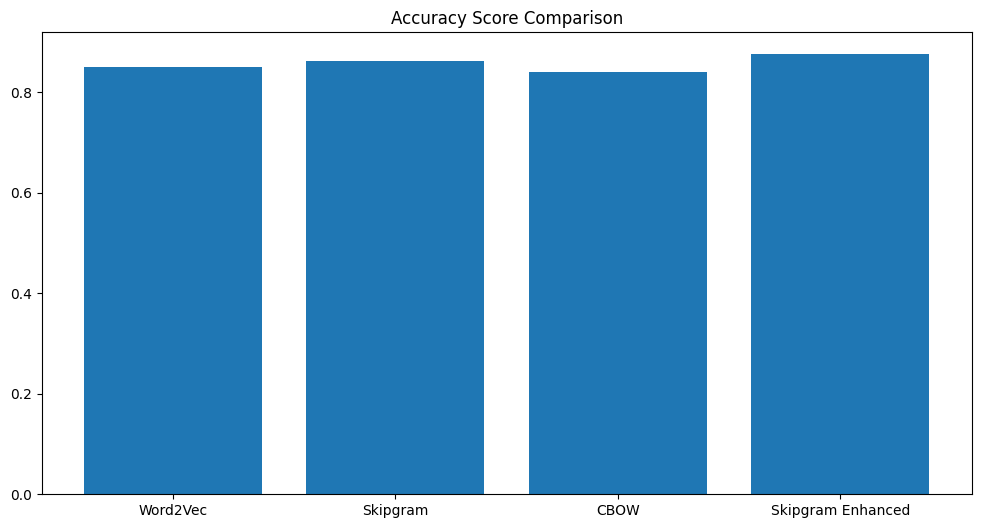

In [59]:

plt.figure(figsize=(12, 6))
plt.bar(['Word2Vec', 'Skipgram', 'CBOW', 'Skipgram Enhanced'], [0.8513, 0.8632, 0.8406, 0.876])
plt.title('Accuracy Score Comparison')
plt.show()
